<a href="https://colab.research.google.com/github/vialbuquerquz/analyticsdata/blob/main/analise_de_acidentes_recife2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Passo 1: Instalar biblioteca
#Passo 2: Importar biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Carregando a base de dados
df = pd.read_csv("acidentes2022.csv", on_bad_lines="skip", sep=";")
#o parametro sep indica que o separador dos elementos no arquivo é um ; e faz a separação automática para visualização do arquivo
#on_bad_lines pula e ignora os erros encontrados no arquivo e carrega o arquivo

In [ ]:
#Visualizando as primeiras linhas do arquivo
df.head(2)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,...,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN


In [ ]:
df.columns #Retorna lista com o nome de todas as colunas pelo pandas

Index(['Protocolo', 'data', 'hora', 'natureza', 'situacao', 'bairro',
       'endereco', 'numero', 'detalhe_endereco_acidente', 'complemento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'auto',
       'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')

In [ ]:
#Configuração para exibição de todas as colunas, o none informa que deve retornar todas as colunas, podendo ser definido como um número específico de colunas

pd.set_option("display.max_columns", None)

In [ ]:
df.head(1)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,JORDÃO,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN


In [ ]:
#Descobrindo quantas linhas e quantas colunas existem
df.shape

(2669, 38)

In [ ]:
#Acessando coluna específica
df["tempo_clima"] #colunas são acessadas em colchetes

0           Bom
1           Bom
2           NaN
3           NaN
4           Bom
         ...   
2664        Bom
2665        Bom
2666        Bom
2667    Chuvoso
2668        NaN
Name: tempo_clima, Length: 2669, dtype: object

In [ ]:
#Acessando os valores únicos de dentro da coluna
df["tempo_clima"].unique()


array(['Bom', nan, 'Chuvoso', 'Nublado'], dtype=object)

In [ ]:
#Descobrindo o tipo de dados de um dataframe

df.dtypes

Protocolo                     object
data                          object
hora                         float64
natureza                      object
situacao                      object
bairro                        object
endereco                      object
numero                        object
detalhe_endereco_acidente     object
complemento                   object
bairro_cruzamento             object
num_semaforo                  object
sentido_via                   object
tipo                          object
auto                          object
moto                          object
ciclom                        object
ciclista                      object
pedestre                      object
onibus                        object
caminhao                      object
viatura                       object
outros                        object
vitimas                       object
vitimasfatais                 object
acidente_verificado           object
tempo_clima                   object
s

In [ ]:
#Descobrindo o tipo de dados de um dataframe para grandes bases de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Protocolo                  2669 non-null   object 
 1   data                       2669 non-null   object 
 2   hora                       0 non-null      float64
 3   natureza                   2669 non-null   object 
 4   situacao                   2669 non-null   object 
 5   bairro                     2659 non-null   object 
 6   endereco                   2663 non-null   object 
 7   numero                     1501 non-null   object 
 8   detalhe_endereco_acidente  1013 non-null   object 
 9   complemento                2514 non-null   object 
 10  bairro_cruzamento          2659 non-null   object 
 11  num_semaforo               631 non-null    object 
 12  sentido_via                1552 non-null   object 
 13  tipo                       2563 non-null   objec

In [ ]:
#Vítimas estão como object(texto) e para ser calculadas as vítimas totais, deve-se alterar o tipo de dado da coluna
#A coluna vitima recebe a coluna vitima com tipo de conteudo string, mudando virgula pra ponto e passando para o formato de float, trnasformando em número
df["vitimas"] = df["vitimas"].str.replace(",",".").astype(float)

In [ ]:
df["vitimas"].sum()

2460.0

In [ ]:
df["vitimasfatais"] = df["vitimasfatais"].str.replace(",",".").astype(float)

In [ ]:
df["vitimasfatais"].sum()

25.0

In [ ]:
#alterando o formato da data, queestava em string para o formato de data
df["data"] = pd.to_datetime(df["data"])

In [ ]:
df.dtypes

Protocolo                            object
data                         datetime64[ns]
hora                                float64
natureza                             object
situacao                             object
bairro                               object
endereco                             object
numero                               object
detalhe_endereco_acidente            object
complemento                          object
bairro_cruzamento                    object
num_semaforo                         object
sentido_via                          object
tipo                                 object
auto                                 object
moto                                 object
ciclom                               object
ciclista                             object
pedestre                             object
onibus                               object
caminhao                             object
viatura                              object
outros                          

In [ ]:
df.head(2)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,JORDÃO,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,IMBIRIBEIRA,"471,0",CIDADE,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN


In [ ]:
#data máxima(última data em que teve um acidente)
max(df["data"])

Timestamp('2022-12-31 00:00:00')

In [ ]:
min(df['data'])

Timestamp('2022-01-01 00:00:00')

In [ ]:
df["tipo"].unique()

array(['COLISÃO FRONTAL', 'COLISÃO TRASEIRA', 'COLISÃO LATERAL',
       'CAPOTAMENTO', nan, 'COLISÃO TRANSVERSAL',
       'ATROPELAMENTO DE PESSOA', 'CHOQUE', 'COLISÃO COM CICLISTA',
       'QUEDA', 'TOMBAMENTO', 'ATROPELAMENTO DE ANIMAL', 'ENGAVETAMENTO',
       'RENDIÇÃO', 'OUTROS', 'PROTESTO', 'APOIO EMLURB', 'MONITORAMENTO',
       'FISCALIZAÇÃO'], dtype=object)

In [ ]:
#quantos valores únicos eixstem na coluna tipo sem contar valores ausentes
df["tipo"].nunique()

18

In [ ]:
#Calculando total de acidentes por tipo // se inserir o argumento dentro do parentese, calcula-se o percentual do total
df["tipo"].value_counts()

COLISÃO LATERAL            838
COLISÃO TRASEIRA           483
COLISÃO FRONTAL            312
COLISÃO TRANSVERSAL        306
ATROPELAMENTO DE PESSOA    203
CHOQUE                     165
COLISÃO COM CICLISTA       128
QUEDA                       79
ATROPELAMENTO DE ANIMAL     12
TOMBAMENTO                  12
CAPOTAMENTO                 11
ENGAVETAMENTO                8
RENDIÇÃO                     1
OUTROS                       1
PROTESTO                     1
APOIO EMLURB                 1
MONITORAMENTO                1
FISCALIZAÇÃO                 1
Name: tipo, dtype: int64

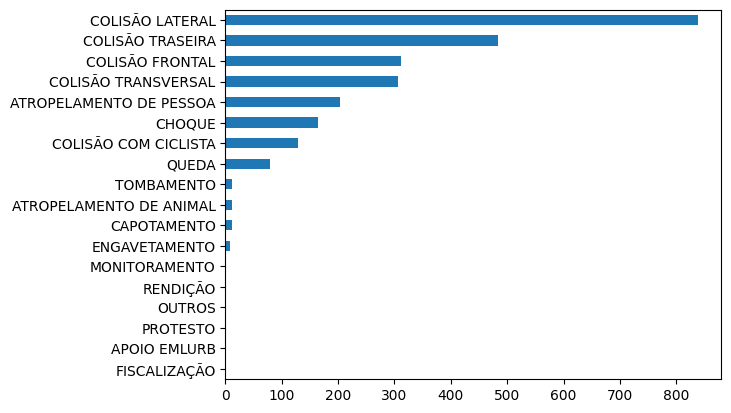

In [ ]:
#Criando gráfico de colunas para exibir a quantidade de acidentes por tipo
#Dentro do value counts recebendo ascending=True classifica os dados em ordem crescente
df["tipo"].value_counts(ascending=True).plot.barh();

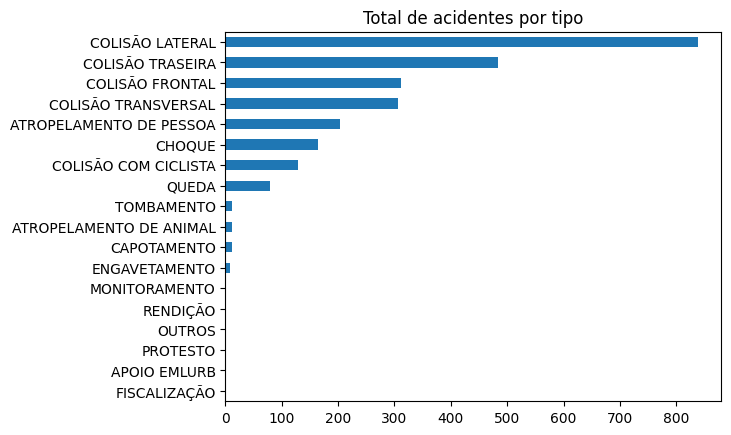

In [ ]:
#criando titulo ao gráfico
df["tipo"].value_counts(ascending=True).plot.barh(title="Total de acidentes por tipo");


In [ ]:
#Verificando valores ausentes por coluna
df.isnull().sum()

Protocolo                       0
data                            0
hora                         2669
natureza                        0
situacao                        0
bairro                         10
endereco                        6
numero                       1168
detalhe_endereco_acidente    1656
complemento                   155
bairro_cruzamento              10
num_semaforo                 2038
sentido_via                  1117
tipo                          106
auto                            0
moto                            0
ciclom                          0
ciclista                        0
pedestre                        0
onibus                          0
caminhao                        0
viatura                         0
outros                          0
vitimas                         0
vitimasfatais                   0
acidente_verificado           577
tempo_clima                   558
situacao_semaforo             579
sinalizacao                   590
condicao_via  

In [ ]:
#Manipulação de dados ausentes para transformar e tornar possível seu uso
#apagar todas as colunas
#apagar linhas com valores ausentes de uma coluna específica
#preenchendo todos os valores nulos de uma coluna por outro valor que faça sentido para dos dados(media, median, números específicos e entre outros)



In [ ]:
#gráfico de total de acidentes por tempo clima
df["tempo_clima"].value_counts()

Bom        1789
Chuvoso     309
Nublado      13
Name: tempo_clima, dtype: int64

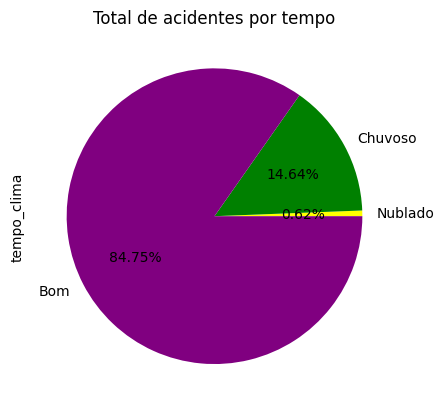

In [ ]:
df["tempo_clima"].value_counts(ascending=True).plot.pie(autopct='%1.2f%%',title="Total de acidentes por tempo", colors=["yellow","green", "purple"]);
#pie é para gráfico de pizza
#autopct='%1.2f%%' exibe a porcentagem dentro do gráfico
#o argumento colors altera as cores do gráfico

<Axes: >

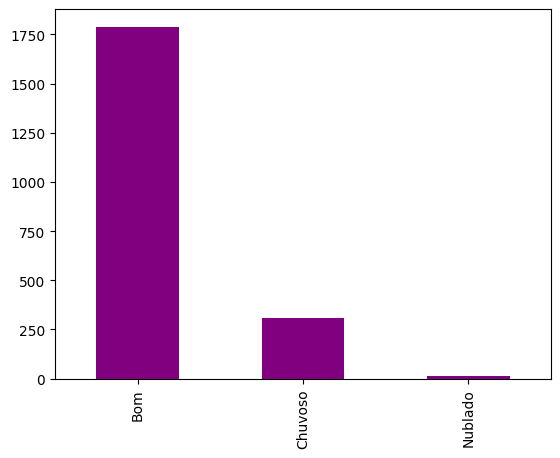

In [ ]:
df["tempo_clima"].value_counts().plot.bar(color=['purple'])

In [ ]:
#Criando gráfico com plotly
clima = df["tempo_clima"].value_counts()
clima.values #Será usado como eixo y do gráfico

array([1789,  309,   13])

In [ ]:
clima.index #Identificação para aplicação do eixo x no gráfico

Index(['Bom', 'Chuvoso', 'Nublado'], dtype='object')

In [ ]:
# Primeiro passamos o parâmetro da biblioteca plotly, o tipo de gráfico a ser usado(bar) e em seguida quais serão as variáveis em x e y
fig = px.bar(x = clima.index, y = clima.values, title = "Total de Acidentes por Clima",
             labels = {"index" : "Clima", "y" : "Total"}, #os labels alteram o título dos eixos x e y
             color_discrete_sequence = ["#800080"], #Alteração de cores do gráfico
             text = clima.values) #Adiciona o rótulo de dados(número de cada dado dentro das tabelas)
fig.show() #Função do plotly para executar a variável fig


#FILTROS

In [ ]:
#Filtrando dados de determinadas categorias
#No exemplo, selecionando todos os dados de colisões laterais
colisaolateral = df[df["tipo"] == "COLISÃO LATERAL"]
colisaolateral

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,JOANA BEZERRA,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,AFLITOS,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN
5,"202200085,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,TAMARINEIRA,AV NORTE MIGUEL ARRAES DE ALENCAR,NaN,RUA CONEGO BARATA,SEMAFORO 062,TAMARINEIRA,"62,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,NaN,NaN,NaN,NaN,NaN
6,"202200086,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,"841,0",NaN,AO LADO DA MAGAZINE E E/F AO RECIFE RADIADORES...,IMBIRIBEIRA,NaN,CIDADE,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Chuvoso,NaN,Perfeito estado,Molhada,Perfeito estado,Outros,NaN,40 km/h,NaN,NaN,NaN,NaN
9,"202200154,0",2022-01-03,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO POSTO DISLUBE,CAXANGÁ,NaN,CAMARAGIBE,COLISÃO LATERAL,"1,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,"202231499,0",2022-12-30,NaN,SEM VÍTIMA,CANCELADA,CAMPO GRANDE,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,EM FRENTE AO POSTO DE GASOLINA BR,CAMPO GRANDE,NaN,CIDADE,COLISÃO LATERAL,"0,0","1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,"202231500,0",2022-12-30,NaN,SEM VÍTIMA,FINALIZADA,PAISSANDU,PTE JOSE DE BARROS LIMA,NaN,NaN,SINISTRO COM UM CAMINHÃO PLACA RHT5182 /NISSA...,PAISSANDU,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2661,"202231501,0",2022-12-30,NaN,COM VÍTIMA,FINALIZADA,IBURA,AV DOIS RIOS,"1059,0",NaN,PROX A FARMACIA PAGUE MENOS,IBURA,"323,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Ilegível,Seca,Perfeito estado,Faixa de pedestre,Não há placas,40 km/h,Dupla,Faixa contínua,NaN,NaN
2666,"202231535,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,AV SATURNINO DE BRITO,"401,0",NaN,EM FRENTE A COMPESA/ SENTIDO BOA VIAGEM,CABANGA,"661,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-19,60 km/h,Única,Faixa seccionada,NaN,NaN


In [ ]:
#Gerando arquivo excel somente com a categoria selecionada(colisão lateral), informando que o index será falso)
colisaolateral.to_excel("Colisão lateral.xlsx", index = False)

In [ ]:
#Selecionando colunas ausentes para análise, através da função isnull()
df[df["divisao_via2"].isnull()]

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,JORDÃO,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,IMBIRIBEIRA,"471,0",CIDADE,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
2,"202200025,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO CRUZAMENTO DE SAN MARTIN E/F A IGREJA...,CAXANGÁ,NaN,NaN,COLISÃO TRASEIRA,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,JOANA BEZERRA,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,AFLITOS,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,"202231513,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,DERBY,PRC PROFESSOR AGEU MAGALHAES,NaN,NaN,EM FRENTE AO QUARTEL DO DERBY,DERBY,NaN,NaN,COLISÃO FRONTAL,"0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",2.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,NaN,NaN,NaN
2665,"202231531,0",2022-12-31,NaN,SEM VÍTIMA,FINALIZADA,BOA VISTA,AV GOVERNADOR AGAMENON MAGALHAES,"2997,0",RUA DR LEOPOLDO LINS,EM FRENTE A CAIXA ENONOMICA FEDERAL,BOA VISTA,"78,0",SUBURBIO,NaN,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,NaN,Única,Canteiro central,NaN,NaN
2666,"202231535,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,AV SATURNINO DE BRITO,"401,0",NaN,EM FRENTE A COMPESA/ SENTIDO BOA VIAGEM,CABANGA,"661,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-19,60 km/h,Única,Faixa seccionada,NaN,NaN
2667,"202231553,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,VIADUTO CAPITAO TEMUDO,NaN,NaN,PROX AO CABAGA IATE CLUB,CABANGA,NaN,SUBURBIO,COLISÃO TRANSVERSAL,"0,0","2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3.0,0.0,Longo da via,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Faixa seccionada,NaN,NaN


In [ ]:
#Selecionando colunas ausentes na categoria de divisão da via2 E que possui a situação finalizada
df[df["divisao_via2"].isnull() & (df["situacao"] == "FINALIZADA")]

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,JORDÃO,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,IMBIRIBEIRA,"471,0",CIDADE,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,AFLITOS,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN
5,"202200085,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,TAMARINEIRA,AV NORTE MIGUEL ARRAES DE ALENCAR,NaN,RUA CONEGO BARATA,SEMAFORO 062,TAMARINEIRA,"62,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,NaN,NaN,NaN,NaN,NaN
6,"202200086,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,"841,0",NaN,AO LADO DA MAGAZINE E E/F AO RECIFE RADIADORES...,IMBIRIBEIRA,NaN,CIDADE,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Chuvoso,NaN,Perfeito estado,Molhada,Perfeito estado,Outros,NaN,40 km/h,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,"202231512,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,"EM FRENTE AO AEROPORTO, PARTE DESATIVADA",IMBIRIBEIRA,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,NaN,NaN,Única,Faixa seccionada,NaN,NaN
2664,"202231513,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,DERBY,PRC PROFESSOR AGEU MAGALHAES,NaN,NaN,EM FRENTE AO QUARTEL DO DERBY,DERBY,NaN,NaN,COLISÃO FRONTAL,"0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",2.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,NaN,NaN,NaN
2665,"202231531,0",2022-12-31,NaN,SEM VÍTIMA,FINALIZADA,BOA VISTA,AV GOVERNADOR AGAMENON MAGALHAES,"2997,0",RUA DR LEOPOLDO LINS,EM FRENTE A CAIXA ENONOMICA FEDERAL,BOA VISTA,"78,0",SUBURBIO,NaN,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,NaN,Única,Canteiro central,NaN,NaN
2666,"202231535,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,AV SATURNINO DE BRITO,"401,0",NaN,EM FRENTE A COMPESA/ SENTIDO BOA VIAGEM,CABANGA,"661,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-19,60 km/h,Única,Faixa seccionada,NaN,NaN


In [ ]:
#Selecionando colunas ausentes na categoria de divisão da via2  OU que possui a situação finalizada
df[df["divisao_via2"].isnull() | (df["situacao"] == "FINALIZADA")]

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,JORDÃO,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,IMBIRIBEIRA,"471,0",CIDADE,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
2,"202200025,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO CRUZAMENTO DE SAN MARTIN E/F A IGREJA...,CAXANGÁ,NaN,NaN,COLISÃO TRASEIRA,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,JOANA BEZERRA,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,AFLITOS,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,"202231513,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,DERBY,PRC PROFESSOR AGEU MAGALHAES,NaN,NaN,EM FRENTE AO QUARTEL DO DERBY,DERBY,NaN,NaN,COLISÃO FRONTAL,"0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",2.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,NaN,NaN,NaN
2665,"202231531,0",2022-12-31,NaN,SEM VÍTIMA,FINALIZADA,BOA VISTA,AV GOVERNADOR AGAMENON MAGALHAES,"2997,0",RUA DR LEOPOLDO LINS,EM FRENTE A CAIXA ENONOMICA FEDERAL,BOA VISTA,"78,0",SUBURBIO,NaN,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,NaN,Única,Canteiro central,NaN,NaN
2666,"202231535,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,AV SATURNINO DE BRITO,"401,0",NaN,EM FRENTE A COMPESA/ SENTIDO BOA VIAGEM,CABANGA,"661,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-19,60 km/h,Única,Faixa seccionada,NaN,NaN
2667,"202231553,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,VIADUTO CAPITAO TEMUDO,NaN,NaN,PROX AO CABAGA IATE CLUB,CABANGA,NaN,SUBURBIO,COLISÃO TRANSVERSAL,"0,0","2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3.0,0.0,Longo da via,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Faixa seccionada,NaN,NaN


In [ ]:
#
df.loc[df["tipo"] == "COLISÃO LATERAL"]

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,JOANA BEZERRA,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,AFLITOS,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN
5,"202200085,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,TAMARINEIRA,AV NORTE MIGUEL ARRAES DE ALENCAR,NaN,RUA CONEGO BARATA,SEMAFORO 062,TAMARINEIRA,"62,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,NaN,NaN,NaN,NaN,NaN
6,"202200086,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,"841,0",NaN,AO LADO DA MAGAZINE E E/F AO RECIFE RADIADORES...,IMBIRIBEIRA,NaN,CIDADE,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Chuvoso,NaN,Perfeito estado,Molhada,Perfeito estado,Outros,NaN,40 km/h,NaN,NaN,NaN,NaN
9,"202200154,0",2022-01-03,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO POSTO DISLUBE,CAXANGÁ,NaN,CAMARAGIBE,COLISÃO LATERAL,"1,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,"202231499,0",2022-12-30,NaN,SEM VÍTIMA,CANCELADA,CAMPO GRANDE,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,EM FRENTE AO POSTO DE GASOLINA BR,CAMPO GRANDE,NaN,CIDADE,COLISÃO LATERAL,"0,0","1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,"202231500,0",2022-12-30,NaN,SEM VÍTIMA,FINALIZADA,PAISSANDU,PTE JOSE DE BARROS LIMA,NaN,NaN,SINISTRO COM UM CAMINHÃO PLACA RHT5182 /NISSA...,PAISSANDU,NaN,SUBURBIO,COLISÃO LATERAL,"1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2661,"202231501,0",2022-12-30,NaN,COM VÍTIMA,FINALIZADA,IBURA,AV DOIS RIOS,"1059,0",NaN,PROX A FARMACIA PAGUE MENOS,IBURA,"323,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Ilegível,Seca,Perfeito estado,Faixa de pedestre,Não há placas,40 km/h,Dupla,Faixa contínua,NaN,NaN
2666,"202231535,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,AV SATURNINO DE BRITO,"401,0",NaN,EM FRENTE A COMPESA/ SENTIDO BOA VIAGEM,CABANGA,"661,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-19,60 km/h,Única,Faixa seccionada,NaN,NaN


In [ ]:
#Gerando um top 10 acidentes com vítimas
#Maiores números de vítimas
df.nlargest(10, 'vitimas') #primeiro arguemento é a quantidade de elementos e o segundo a categoria a ser explorada
#nlargest para hankear os maiores valores dentro da categoria informada

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
351,"202203796,0",2022-02-21,NaN,COM VÍTIMA,FINALIZADA,IBURA,AV DOM HELDER CAMARA,"104,0",RUA JORNALISTA EDSON REGIS,LINHA DO TREM,IBURA,"518,0",NaN,COLISÃO TRASEIRA,"0,0","0,0","0,0","0,0","0,0","2,0","0,0","0,0","0,0",8.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6c,NaN,Dupla,Canteiro central,NaN,NaN
786,"202209783,0",2022-05-02,NaN,COM VÍTIMA,FINALIZADA,IPSEP,AV RECIFE,NaN,NaN,EM FRENTE À PETRO SERVICE CAR / SENTIDO BOA VI...,IPSEP,NaN,NaN,COLISÃO TRASEIRA,"0,0","0,0","0,0","0,0","0,0","2,0","0,0","0,0","0,0",7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,"202208182,0",2022-04-12,NaN,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV SUL,NaN,NaN,PATIO TERMINAL DE ONIBUS TRANCREDO NEVES,IMBIRIBEIRA,NaN,NaN,COLISÃO TRASEIRA,"0,0","0,0","0,0","0,0","0,0","2,0","0,0","0,0","0,0",5.0,0.0,Outros,Bom,Não existe,Não existente,Seca,Mal conservada,Não existe,Não há placas,NaN,Única,NaN,NaN,NaN
1558,"202219371,0",2022-08-20,NaN,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,"125,0",NaN,EM FRENTE A LOJA MUNDO DO CABELEIREIRO,IMBIRIBEIRA,NaN,NaN,CHOQUE,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",5.0,0.0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",40 km/h,Única,Faixa seccionada,NaN,NaN
1114,"202214035,0",2022-06-19,NaN,COM VÍTIMA,FINALIZADA,BOA VIAGEM,AV DES JOSE NEVES,NaN,AV JOAQUIM RIBEIRO,"PROXIMO A FERREIRA PINTO, ANTES DO TÚNEL ALGU...",BOA VIAGEM,"567,0",SUBURBIO,COLISÃO TRANSVERSAL,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",4.0,0.0,Longo da via,Chuvoso,Sem defeito,Perfeito estado,Molhada,Mal iluminada,Faixa de pedestre,NaN,NaN,Única,Faixa seccionada,NaN,NaN
1257,"202215665,0",2022-07-09,NaN,COM VÍTIMA,FINALIZADA,CASA AMARELA,AV NORTE MIGUEL ARRAES DE ALENCAR,NaN,NaN,SUPERMERCADO MAIS VOCÊ,CASA AMARELA,"95,0",SUBURBIO,COLISÃO TRASEIRA,"2,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",4.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Dupla,Canteiro central,NaN,NaN
2200,"202226133,0",2022-11-03,NaN,COM VÍTIMA,FINALIZADA,BEBERIBE,AV BEBERIBE,"1469,0",RUA SETE PECADOS,EM FRENTE AO BARRACÃO,BEBERIBE,NaN,NaN,COLISÃO TRANSVERSAL,"0,0","2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",4.0,0.0,Cruzamento,Bom,Não existe,NaN,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
63,"202200692,0",2022-01-10,NaN,COM VÍTIMA,FINALIZADA,ESPINHEIRO,RUA DO ESPINHEIRO,"200,0",RUA SANTO ELIAS,E/F AO POSTO IPIRANGA,ESPINHEIRO,NaN,CIDADE,COLISÃO TRANSVERSAL,"0,0","2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3.0,0.0,Cruzamento,Bom,Não existe,Ilegível,Seca,Perfeito estado,Faixa de pedestre,"Placas ""Pare""",NaN,Única,Faixa seccionada,NaN,NaN
143,"202201504,0",2022-01-23,NaN,COM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA VISCONDE DE JEQUITINHONHA,"1400,0",NaN,POR TRAS DO PARQUE DONA LINDU BEIRA CANAL S/T ...,BOA VIAGEM,NaN,SUBURBIO,ENGAVETAMENTO,"3,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3.0,0.0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de retenção,Não há placas,NaN,Única,Faixa seccionada,Outros,NaN
920,"202211361,0",2022-05-19,NaN,COM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA DOS NAVEGANTES,"785,0",RUA ERNESTO DE PAULA SANTOS,POR TRAS DO ANTIGO RECIFE PALACE,BOA VIAGEM,NaN,NaN,COLISÃO TRANSVERSAL,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de retenção,"Placas ""Pare""",NaN,Única,Faixa seccionada,NaN,NaN


In [ ]:
df.nsmallest(10, 'vitimas') #nsmallest para buscar o hanking de menores quantidades

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,IMBIRIBEIRA,"471,0",CIDADE,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
7,"202200107,0",2022-01-03,NaN,SEM VÍTIMA,FINALIZADA,VASCO DA GAMA,RUA NORDESTE,"109,0",NaN,EM FRENTE AO Nº 109,VASCO DA GAMA,NaN,CIDADE,CAPOTAMENTO,"0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",0.0,0.0,NaN,Chuvoso,Não existe,Não existente,Molhada,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
8,"202200139,0",2022-01-03,NaN,SEM VÍTIMA,FINALIZADA,TAMARINEIRA,RUA CONEGO BARATA,"410,0",NaN,EM FRENTE A BORRACHARIA,TAMARINEIRA,NaN,SUBURBIO,NaN,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,NaN,Dupla,Faixa seccionada,Canteiro central,NaN
17,"202200196,0",2022-01-04,NaN,SEM VÍTIMA,FINALIZADA,VASCO DA GAMA,RUA PLANALTO,"157,0",NaN,COMUNIDADE ALTO NOSSA SENHORA DE FÁTIMA,VASCO DA GAMA,NaN,SUBURBIO,CHOQUE,"0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",0.0,0.0,NaN,Bom,NaN,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
24,"202200268,0",2022-01-05,NaN,SEM VÍTIMA,FINALIZADA,ARRUDA,AV PROFESSOR JOSE DOS ANJOS,"162,0",NaN,EM FRENTE AO Nº 162 - SENTIDO CIDADE/SUBÚRBIO,ARRUDA,"131,0",SUBURBIO,NaN,"0,0","1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,R-4b,40 km/h,Dupla,Canal,NaN,NaN
27,"202200288,0",2022-01-05,NaN,SEM VÍTIMA,FINALIZADA,ÁGUA FRIA,EST VELHA DE AGUA FRIA,"1110,0",NaN,NaN,ÁGUA FRIA,NaN,SUBURBIO,CHOQUE,"0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,NaN,Dupla,Canteiro central,NaN,NaN
34,"202200333,0",2022-01-06,NaN,SEM VÍTIMA,FINALIZADA,CASA AMARELA,RUA EUGENIO SAMICO,NaN,RUA OSCAR DE BARROS,AO LADO DO CENTRO DE SAÚDE MÁRIO RAMOS ( PROFE...,CASA AMARELA,NaN,SUBURBIO,NaN,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Cruzamento,Bom,Não existe,NaN,Seca,Perfeito estado,Faixa de pedestre,Outras,30 km/h,Dupla,Não existe,NaN,NaN
36,"202200372,0",2022-01-06,NaN,SEM VÍTIMA,FINALIZADA,SANTO ANTÔNIO,RUA IMPERADOR PEDRO SEGUNDO,NaN,NaN,"POR TRAS DO FORUM THOMAZ DE AQUINO, INFORMAÇÃO...",SANTO ANTÔNIO,"203,0",CIDADE,NaN,"3,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,NaN,Única,Faixa contínua,NaN,NaN
43,"202200439,0",2022-01-07,NaN,SEM VÍTIMA,CANCELADA,BOA VISTA,AV CONDE DA BOA VISTA,NaN,NaN,E/F A GRÁFICA NACIONAL,BOA VISTA,NaN,SUBURBIO,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,"202200633,0",2022-01-10,NaN,SEM VÍTIMA,FINALIZADA,ILHA DO LEITE,AV GOVERNADOR AGAMENON MAGALHAES,"4779,0",NaN,EM FRENTE AO ISAAC NEWTON,ILHA DO LEITE,NaN,NaN,COLISÃO LATERAL,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(5) #Retorna uma amostra aleatória dos dados em análise e no argumento informa-se a quantidade de linhas desejadas

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
2124,"202225444,0",2022-10-26,NaN,COM VÍTIMA,FINALIZADA,SANTO AMARO,AV CRUZ CABUGA,NaN,NaN,NA ESTAÇÃO DO BRT TACARUNA,SANTO AMARO,"470,0",CIDADE,ATROPELAMENTO DE PESSOA,"0,0","0,0","0,0","0,0","1,0","1,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Agente,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
1149,"202214462,0",2022-06-23,NaN,COM VÍTIMA,FINALIZADA,AREIAS,RUA JORNALISTA VILMA LESSA,"875,0",NaN,Flesh Hamburgueria,AREIAS,NaN,SUBURBIO,COLISÃO TRANSVERSAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Não existente,Seca,Mal conservada,Não existe,Não há placas,30 km/h,Dupla,Não existe,NaN,NaN
101,"202201090,0",2022-01-17,NaN,SEM VÍTIMA,FINALIZADA,ENGENHO DO MEIO,AV ENGENHEIRO ABDIAS DE CARVALHO,NaN,NaN,"EM FRENTE AO POSTO BR, SENT. CURADO",ENGENHO DO MEIO,NaN,NaN,CHOQUE,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2475,"202229306,0",2022-12-08,NaN,COM VÍTIMA,FINALIZADA,SÃO JOSÉ,RUA IMPERIAL,"1898,0",NaN,NaN,SÃO JOSÉ,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Única,Não existe,NaN,NaN
757,"202209269,0",2022-04-26,NaN,SEM VÍTIMA,FINALIZADA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,NaN,RUA SAO CAETANO,PROX A LOJA RPL,CAMPO GRANDE,NaN,NaN,COLISÃO FRONTAL,"1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Somando total de vítimas por tipo de acidentes através do agrupamento por tipo
vitimasportipo = df.groupby('tipo')['vitimas'].sum().reset_index() #Primeiro informamos a categoria a ser agrupada e depois a categoria a ser agregada, na função de soma e resetando para geração de um dataframe que facilita a utilização de métodos do pandas
vitimasportipo.sort_values('vitimas', ascending=True) #Estruturando ordenação dos dados do menor pro maior, determinada pelo True

,tipo,vitimas
14,PROTESTO,0.0
12,MONITORAMENTO,0.0
11,FISCALIZAÇÃO,0.0
16,RENDIÇÃO,0.0
0,APOIO EMLURB,1.0
13,OUTROS,1.0
3,CAPOTAMENTO,3.0
17,TOMBAMENTO,8.0
1,ATROPELAMENTO DE ANIMAL,8.0
10,ENGAVETAMENTO,10.0


In [ ]:
acidentesporbairro = df['bairro'].value_counts().head(10).reset_index()#Contagem de bairros com mais acidentes, head retorna as n(10) primeiras linhas

In [ ]:
acidentesporbairro.columns = ["Bairro", "Acidentes"]
acidentesporbairro

,Bairro,Acidentes
0,BOA VIAGEM,301
1,SANTO AMARO,141
2,IMBIRIBEIRA,140
3,BOA VISTA,94
4,MADALENA,88
5,AFOGADOS,86
6,CASA AMARELA,83
7,CORDEIRO,72
8,AREIAS,71
9,PINA,69


In [ ]:
figbairro = px.bar( acidentesporbairro, x="Acidentes", y="Bairro",
                   title = "Total de Acidentes por Clima",
                   color_discrete_sequence=['#800080'],
                    #text="Total",
                   orientation="h")
figbairro

In [ ]:
# Adicionando uma nova coluna com o mês do acidente
#adicionando a variável de contagem do mês a nova coluna criada
df["Mês do acidente"] = df["data"].dt.month
df.sample(3)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,Mês do acidente
2071,"202224981,0",2022-10-21,NaN,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,"306,0",NaN,EM FRENTE AO SUPERMERCADO RECIBOM,BOA VIAGEM,"142,0",SUBURBIO,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,60 km/h,Única,Faixa seccionada,NaN,NaN,10
1360,"202217025,0",2022-07-26,NaN,COM VÍTIMA,FINALIZADA,CORDEIRO,EST DO FORTE DO ARRAIAL N. DO B. JESUS,NaN,RUA GOMES TABORDA,PROXIMO AO SEMÁFORO 249,CORDEIRO,"249,0",SUBURBIO,COLISÃO LATERAL,"0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",1.0,0.0,Esquina,Chuvoso,Sem defeito,Incompleta,Molhada,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,NaN,NaN,NaN,7
1686,"202220639,0",2022-09-02,NaN,SEM VÍTIMA,FINALIZADA,BAIRRO DO RECIFE,PTE GIRATORIA,NaN,NaN,SOBRE A PONTE,BAIRRO DO RECIFE,NaN,NaN,CHOQUE,"0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",0.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de retenção,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN,9


In [ ]:
#Visualização as cinco ultimas linhas do data frame
df.tail(5)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,Mês do acidente
2664,"202231513,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,DERBY,PRC PROFESSOR AGEU MAGALHAES,NaN,NaN,EM FRENTE AO QUARTEL DO DERBY,DERBY,NaN,NaN,COLISÃO FRONTAL,"0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",2.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,NaN,NaN,NaN,12
2665,"202231531,0",2022-12-31,NaN,SEM VÍTIMA,FINALIZADA,BOA VISTA,AV GOVERNADOR AGAMENON MAGALHAES,"2997,0",RUA DR LEOPOLDO LINS,EM FRENTE A CAIXA ENONOMICA FEDERAL,BOA VISTA,"78,0",SUBURBIO,NaN,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",0.0,0.0,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,NaN,Única,Canteiro central,NaN,NaN,12
2666,"202231535,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,AV SATURNINO DE BRITO,"401,0",NaN,EM FRENTE A COMPESA/ SENTIDO BOA VIAGEM,CABANGA,"661,0",SUBURBIO,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-19,60 km/h,Única,Faixa seccionada,NaN,NaN,12
2667,"202231553,0",2022-12-31,NaN,COM VÍTIMA,FINALIZADA,CABANGA,VIADUTO CAPITAO TEMUDO,NaN,NaN,PROX AO CABAGA IATE CLUB,CABANGA,NaN,SUBURBIO,COLISÃO TRANSVERSAL,"0,0","2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3.0,0.0,Longo da via,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Faixa seccionada,NaN,NaN,12
2668,"202231555,0",2022-12-31,NaN,SEM VÍTIMA,CANCELADA,LINHA DO TIRO,RUA ALTO DO TIRO,NaN,NaN,"AO DO CAMPO DO CAFÉ ,",LINHA DO TIRO,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [ ]:
#Criando função para criar nova coluna no df
def houve_vitima(coluna):
  if coluna == 0:
    return "nao_houve_Vitima"
  else:
    return "teve_Vitima"

In [ ]:
#Chamando função
df["Teve_Vitima"] = df["vitimas"].apply(houve_vitima)

In [ ]:
#Calculo de vítimas por mês, transformando em index e ordenando os valores a partir do index
vitimaspormes = (df["data"].dt.month).value_counts().reset_index().sort_values('index', ascending=True)
vitimaspormes

,index,data
7,1,211
10,2,188
9,3,193
11,4,186
8,5,200
6,6,217
5,7,219
0,8,258
2,9,253
3,10,251


In [ ]:
figmes = px.line(vitimaspormes, x="index", y="data",
              title='Total Acidentes Por Mês',
              labels={"index":"Mês", "Mes_Acidente":"Total"},
              markers=True, template="plotly_dark", #o argumento makers true pontua os meses em cada linha para facilitar o acesso ao resultado
              color_discrete_sequence=["#FF4500"])
figmes.show()